In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras as ks

In [3]:
from tensorflow.estimator import LinearRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
print(tf.__version__)

2.1.0


In [4]:
boston_data = datasets.load_boston()

In [5]:
feature_columns = boston_data.feature_names
target_column = boston_data.target

In [6]:
boston_data = pd.DataFrame(boston_data.data,columns=
                           feature_columns).astype(np.float32)

In [7]:
boston_data['MDEV'] = target_column.astype(np.float32)

In [8]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.099998,2.4786,1.0,273.0,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.699997,2.2875,1.0,273.0,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300003,2.3889,1.0,273.0,21.000000,393.450012,6.48,22.000000


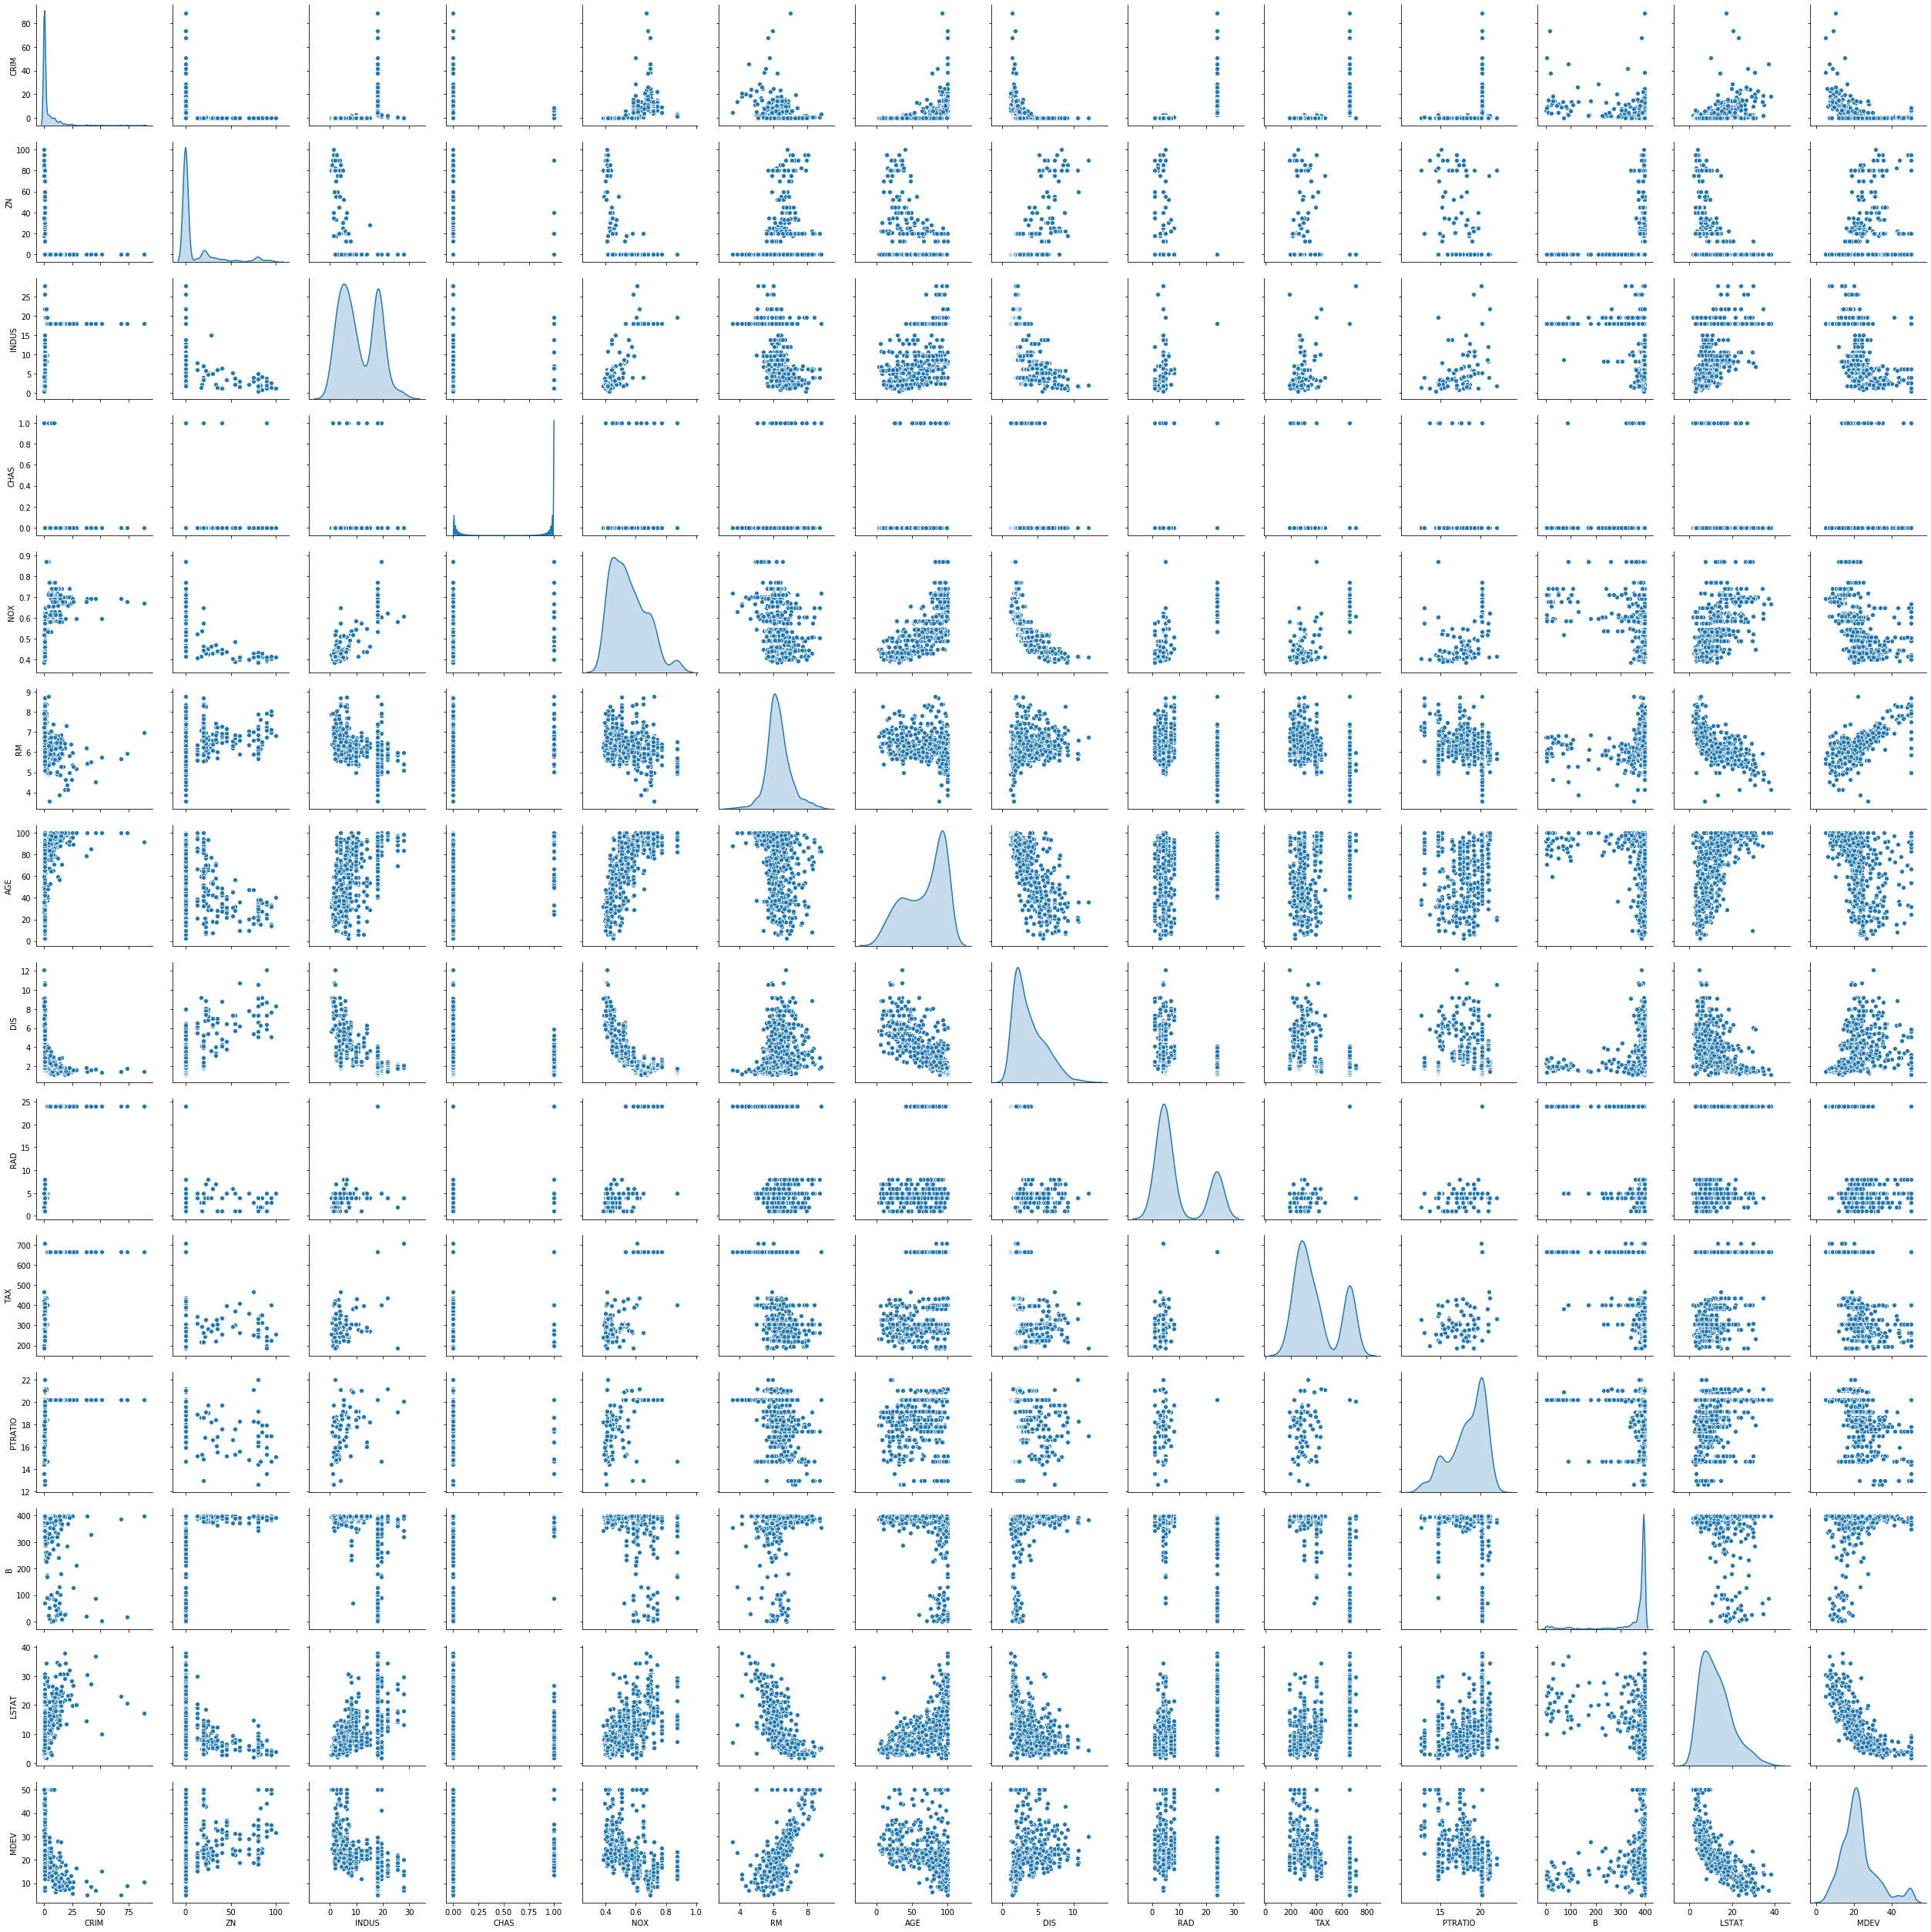

In [9]:
sb.pairplot(boston_data,diag_kind='kde')

In [10]:
correlation_data = boston_data.corr()

In [11]:
correlation_data.style.background_gradient(
    cmap='coolwarm', axis=None)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
INDUS,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
CHAS,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
NOX,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.69536
AGE,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536


In [12]:
boston_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613523,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322390,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136797,6.860355,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253993,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554696,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284636,0.702617,3.56100,5.885500,6.208500,6.623500,8.780000
AGE,506.0,68.574921,28.148869,2.90000,45.025000,77.500000,94.074999,100.000000
DIS,506.0,3.795043,2.105711,1.12960,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707269,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,408.237152,168.537170,187.00000,279.000000,330.000000,666.000000,711.000000


In [13]:
X_data = boston_data[[i for i in boston_data.columns if i not in ['MDEV']]]

In [14]:
Y_data = boston_data[['MDEV']]

In [15]:
X_data.shape, Y_data.shape

((506, 13), (506, 1))

In [16]:
training_features, test_features, training_labels, test_labels=train_test_split(X_data, Y_data, test_size=0.2)

In [17]:
print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.shape[0])
print('No. of columns in Training Features: ', training_features.shape[1])
print('No. of columns in Test Features: ', test_features.shape[1])
print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[1])
print('No. of columns in Test Label: ', test_labels.shape[1])

No. of rows in Training Features:  404
No. of rows in Test Features:  102
No. of columns in Training Features:  13
No. of columns in Test Features:  13
No. of rows in Training Label:  404
No. of rows in Test Label:  102
No. of columns in Training Label:  1
No. of columns in Test Label:  1


In [18]:
def norm(x):
    stat = x.describe()
    stat = stat.transpose()
    return ( x - stat['mean'])/ stat['std']

In [19]:
normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

#### Input Pipeline 

In [20]:
def feed_input(fetaures_dataframe, target_dataframe, num_of_epochs=10,
               shuffle=True, batch_size= 32):
    def input_feed_function():
        dataset = tf.data.Dataset.from_tensor_slices((dict(fetaures_dataframe),
                                                     target_dataframe))
        
        if shuffle:
            dataset = dataset.shuffle(2000)
        dataset = dataset.batch(batch_size).repeat(num_of_epochs)
        return dataset
    return input_feed_function


In [21]:
train_input_feed = feed_input(normed_train_features, training_labels)
train_input_feed_testing = feed_input(normed_train_features, training_labels, 
                                      num_of_epochs=1, shuffle=False)


In [22]:
test_feed_input = feed_input(normed_test_features, test_labels, 
                             num_of_epochs=1,shuffle=False)

In [23]:
feature_columns_numeric = [tf.feature_column.numeric_column(m)
                          for m in training_features.columns]

#### Create model

In [24]:
linear_model = LinearRegressor(feature_columns=feature_columns_numeric,
                              optimizer='RMSProp')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpffqpqt_u', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
linear_model.train(train_input_feed)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpffqpqt_u/model.ckpt.
INFO:tensorflow:loss = 678.5678, step = 0
INFO:tensorflow:global_step/sec: 426.908
INFO:tensorflow:loss = 54.2005, step = 100 (0.236 sec)
INFO:tensorflow:Saving checkpoints for 130 into /tmp/tmpffqpqt_u/model.ckpt.
INFO:tensorflow:Loss for final step: 17.62861.


#### Prediction

In [26]:
train_predictions = linear_model.predict(train_input_feed_testing)
test_predictions = linear_model.predict(test_feed_input)

In [27]:
train_predictions_series = pd.Series([p['predictions'][0] 
                                      for p in train_predictions])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpffqpqt_u/model.ckpt-130
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [28]:
test_predictions_series = pd.Series([p['predictions'][0] 
                                      for p in test_predictions])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpffqpqt_u/model.ckpt-130
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [29]:
pd.Series([p['predictions'][1] for p in train_predictions])

Series([], dtype: float64)

In [30]:
train_predictions_df = pd.DataFrame(train_predictions_series,
                                   columns=['predictions'])

test_predictions_df = pd.DataFrame(test_predictions_series,
                                   columns=['predictions'])

training_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)

train_labels_with_predictions_df = pd.concat([training_labels,
                                    train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels,
                                    test_predictions_df], axis=1)

In [31]:
def calculate_errors_and_r2(y_true, y_pred):
    mean_squared_err = (mean_squared_error(y_true, y_pred))
    root_mean_squared_err = np.sqrt(mean_squared_err)
    r2 = round(r2_score(y_true, y_pred)*100,0)
    return mean_squared_err, root_mean_squared_err, r2

train_mean_squared_error, train_root_mean_squared_error,train_r2_score_percentage = calculate_errors_and_r2(
    training_labels, train_predictions_series)

test_mean_squared_error, test_root_mean_squared_error,test_r2_score_percentage = calculate_errors_and_r2(
    test_labels, test_predictions_series)

print('Training Data Mean Squared Error = ', train_mean_squared_error)
print('Training Data Root Mean Squared Error = ', train_root_mean_squared_error)
print('Training Data R2 = ', train_r2_score_percentage)

Training Data Mean Squared Error =  20.875225984193886
Training Data Root Mean Squared Error =  4.5689414511672055
Training Data R2 =  75.0


In [32]:
print('Test Data Mean Squared Error = ', test_mean_squared_error)
print('Test Data Root Mean Squared Error = ', test_root_mean_squared_error)
print('Test Data R2 = ', test_r2_score_percentage)

Test Data Mean Squared Error =  30.516845273993432
Test Data Root Mean Squared Error =  5.524205397520392
Test Data R2 =  67.0
